# Question 1 SC19B081

## Dataset Description

Optical Recognition of Handwritten Digits Dataset from the UCI repository. The original dataset consists of normalized bitmaps of handwritten digits (0-9). 32x32 bitmaps are divided into non-overlapping blocks of 4x4 and the number of ON pixels are counted in each block. This generates an input matrix of 8x8 where each element is an integer in the range 0-16.  This
reduces dimensionality and gives invariance to small distortions.

The given dataset is a modified version of the above dataset, consisting of the data corresponding to the handwritten digits 5 & 6 extracted from the original dataset.
- $\textbf{Training data}$: 'P1\_data\_train.csv' consisting of 777 instances(rows) of 64 attributes(cols) corresponding to the handwritten digit value(5 or 6) given in 'P1\_labels\_train.csv'.
- $\textbf{Test data}$: 'P1\_data\_test.csv' consisting of 333 instances(rows) of 64 attributes(cols) corresponding to the handwritten digit value(5 or 6) given in 'P1\_labels\_test.csv'.

Design a Bayes Classifier for the following data.

## Importing Libraries

In [281]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

##  Training

### Importing data 

There are 2 csv files for training, one of them is a feature vector and the other is class label.

In [282]:
#first we start by labeling each column 
input_names = np.linspace(1,64,64,dtype='str')

for i in range(64):
    input_names[i] = str(input_names[i])
    
X_train = pd.read_csv('P1_data_train.csv', names=input_names)
y_train = pd.read_csv('P1_labels_train.csv', names= ['class'])

#print(X_train[:5])
#print(y_train[:5])

### Grouping feature vectors 

After importing, we would like to group all feature vectors that belong to 5 and those that belong to 6.

In [ ]:
X_train_5_p = X_train.loc[y_train['class']==5] #p denotes pandas df
X_train_6_p = X_train.loc[y_train['class']==6]


'''
verifying if they sum up to 777
print(X_train_5.size/64)
print(X_train_6.size/64)
it does add up to 777
'''
#X_train_5.columns
#from matplotlib import pyplot
#X_train_5.plot(y=60,kind='hist')


### Estimating mean vector

In this we will be calculating $\mu_5$ and $\mu_6$ vectors

In [287]:
# maximum likelihood of mean is just sample mean 
# for calculating mean I'll be using in-built function as it is just summation over each column 

mu_5_p = X_train_5_p.mean()
mu_6_p = X_train_6_p.mean()

print(mu_5_p,'\n\n\n',mu_6_p)


1.0      5.000000
2.0      5.083333
3.0      8.515152
4.0     10.340909
5.0     10.772727
          ...    
60.0    10.563131
61.0     9.065657
62.0     6.739899
63.0     5.068182
64.0     5.244949
Length: 64, dtype: float64 


 1.0      5.196850
2.0      5.089239
3.0      5.952756
4.0     10.070866
5.0      8.569554
          ...    
60.0     9.440945
61.0    11.301837
62.0     9.955381
63.0     6.664042
64.0     5.291339
Length: 64, dtype: float64


### Estimating Co-variance Matrix

In this we will be calculating $\Sigma_5$ and $\Sigma_6$ matrices

In [289]:
# maximum likelihood of covariance is just sample covariance (proved in class, slides 70-76)
# for calculating covariance I'll be using in-built function as it is just summation of product of normalised data points

Sigma_5_p = X_train_5_p.cov()
Sigma_6_p = X_train_6_p.cov()

# easier to work with numpy datatype
X_train_5 = np.array(X_train_5_p)
X_train_6 = np.array(X_train_6_p)
mu_5 = np.array(mu_5_p)
mu_6 = np.array(mu_6_p)
Sigma_5 = np.array(Sigma_5_p)
Sigma_6 = np.array(Sigma_6_p)

print(f'{Sigma_5 = }\n\n\n {Sigma_6 = }')


Sigma_5 = array([[38.97721519, 21.53924051, 23.65316456, ..., 24.77468354,
        24.91392405, 25.78481013],
       [21.53924051, 38.60316456, 23.07088608, ..., 27.92299578,
        23.6221519 , 25.58966245],
       [23.65316456, 23.07088608, 44.78711162, ..., 24.03306483,
        19.3976985 , 26.96969697],
       ...,
       [24.77468354, 27.92299578, 24.03306483, ..., 45.74230277,
        26.31904488, 24.55501215],
       [24.91392405, 23.6221519 , 19.3976985 , ..., 26.31904488,
        39.38521289, 25.01616801],
       [25.78481013, 25.58966245, 26.96969697, ..., 24.55501215,
        25.01616801, 41.18794911]])


 Sigma_6 = array([[43.03746374, 23.49028181, 25.69353502, ..., 20.91406962,
        24.07683382, 28.56881475],
       [23.49028181, 40.40254179, 26.04896395, ..., 25.18293963,
        26.83795414, 27.82393286],
       [25.69353502, 26.04896395, 42.90302528, ..., 22.43736013,
        20.97092831, 29.23485288],
       ...,
       [20.91406962, 25.18293963, 22.43736013, ..., 

## Testing

### Importing data 

There are 2 csv files for testing, one of them is a feature vector and the other is class label.

In [290]:
X_test_p = pd.read_csv('P1_data_test.csv', names=input_names)
y_test_p = pd.read_csv('P1_labels_test.csv', names= ['class'])

X_test = np.array(X_test_p)
y_test = np.array(y_test_p)

### Creating a density function

To design a Bayes classifier we need the density/distribution of the features.

Given data and assuming Gaussian distribution, we have estimated the maximum likelihood parameters of Gaussian.<br>
[Here we are defining Mahalanobis distance seperately for reasons which will be discussed later.]

In [291]:
def Gaussian(x,mu,Sigma): #3rd argument should be SD and not var if 1Dimensional
     if (isinstance(mu,int) or mu.size ==1): #univariate gaussian
          return (1/(Sigma*np.sqrt(2*np.pi)))*(np.exp(-1*(x - mu)**2 / (2*Sigma**2)))
     n = mu.size

     Sig_det = np.linalg.det(Sigma) 
     C = ((2*np.pi)**n)
     Mlbns_dist = Mahalanobis_distance(x,mu,Sigma)
     y = (np.exp(-1*Mlbns_dist/2)/
          np.sqrt(C*Sig_det))

     return y

def Mahalanobis_distance(x,mu,Sigma):
     n = mu.size
     mu = np.array(mu)
     Sigma = np.array(Sigma)
     x_hat = x-mu
     try:
          Mlbns_dist = x_hat@Sigma@x_hat.T #Mahalanobis distance squared
     except:
          print("dimensions dont match")
     else:
          Mlbns_dist = x_hat.T@Sigma@x_hat #Mahalanobis distance squared
     return Mlbns_dist


### Verifying the density estimation

The reason why we are doing this is because Sigma\_5 and Sigma\_6 have a very high variance and intuitively this is not desirable for good density estimation.
We will verify this in 2 ways.
- First we'll see the probability of the same data with which we estimated our parameters(ideally should be at least in magnitude of 10\^-3 for the given number of samples)
- After which we will plot the histograms and density estimated for randomly chosen features and visually verify if the estimation seems right

In [292]:
rand_sample_5 = np.random.randint(0,(X_train_5.size)/64,4)
rand_sample_6 = np.random.randint(0,(X_train_6.size)/64,4)

for i in range(4):
    print(f'probability that features(X_train_5[{rand_sample_5[i]},:]) belongs to class label 5 =  {Gaussian(X_train_5[rand_sample_5[i],:],mu_5,Sigma_5)}')
    print(f'probability that features(X_train_6[{rand_sample_6[i]},:]) belongs to class label 6 =  {Gaussian(X_train_6[rand_sample_6[i],:],mu_6,Sigma_6)}')


probability that features(X_train_5[96,:]) belongs to class label 5 =  0.0
probability that features(X_train_6[79,:]) belongs to class label 6 =  0.0
probability that features(X_train_5[226,:]) belongs to class label 5 =  0.0
probability that features(X_train_6[348,:]) belongs to class label 6 =  0.0
probability that features(X_train_5[126,:]) belongs to class label 5 =  0.0
probability that features(X_train_6[147,:]) belongs to class label 6 =  0.0
probability that features(X_train_5[312,:]) belongs to class label 5 =  0.0
probability that features(X_train_6[212,:]) belongs to class label 6 =  0.0


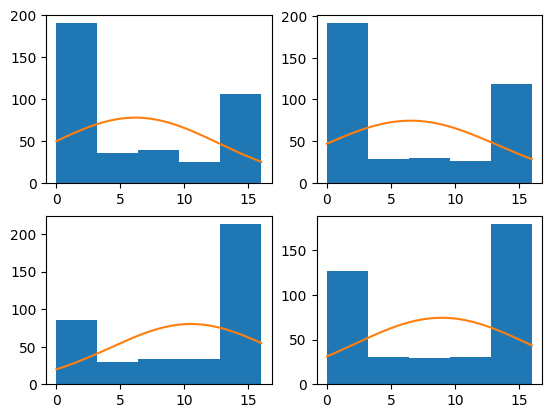

In [293]:
random_features = np.random.randint(0,64,4)
nbins = 5 
fig,ax = plt.subplots(2,2)


### Data visualization is only done for class 5, class 6 distribution would also be similar

i = random_features[0]
X = X_train_5[:,i]
amp = len(X)*max(X)/nbins
ax[0][0].hist(X,nbins,label='data')
X_lin = np.linspace(0,16,X.size)
y = amp*Gaussian(X_lin,mu_5[i],np.sqrt(Sigma_5[i,i]))
ax[0][0].plot(X_lin,y,label='estimated')


i = random_features[1]
X = X_train_5[:,i]
amp = len(X)*max(X)/nbins
ax[0][1].hist(X,nbins,label='data')
X_lin = np.linspace(0,16,X.size)
y = amp*Gaussian(X_lin,mu_5[i],np.sqrt(Sigma_5[i,i]))
ax[0][1].plot(X_lin,y,label='estimated')


i = random_features[2]
X = X_train_5[:,i]
amp = len(X)*max(X)/nbins
ax[1][0].hist(X,nbins,label='data')
X_lin = np.linspace(0,16,X.size)
y = amp*Gaussian(X_lin,mu_5[i],np.sqrt(Sigma_5[i,i]))
ax[1][0].plot(X_lin,y,label='estimated')


i = random_features[3]
X = X_train_5[:,i]
amp = len(X)*max(X)/nbins
ax[1][1].hist(X,nbins,label='data')
X_lin = np.linspace(0,16,X.size)
y = amp*Gaussian(X_lin,mu_5[i],np.sqrt(Sigma_5[i,i]))
ax[1][1].plot(X_lin,y,label='estimated')

plt.show()

### Where is the problem?

Visually there seems to be no problem in the estimation, but probability of the same data with which we estimated the parameters is giving 0.<br>
The features are not getting labelled into either of the classes (as probabilities of them belonging to either class 0).<br>
What is the difference? why is second method of verification "right"?<br>
It probably has to do with the covariance terms, that could be the only other thing increasing our Mahalanobis distance (which in-turn reduces the overall probability)

In [294]:
def diagonal_matrix(Matrix):

    Matrix = np.array(Matrix) #normalising to a numpy array
    nrow = np.size(Matrix,0)
    ncol = np.size(Matrix,1)
    
    assert (nrow == ncol),'Input should be square matrix'
    for i in range(nrow):
        for j in range(ncol):
            if(i!=j):
                Matrix[i,j] = 0
            else:
                continue
    return Matrix
        

In [295]:
Sigma_5_diag = diagonal_matrix(Sigma_5)
Sigma_6_diag = diagonal_matrix(Sigma_6)

for i in range(4):
    print(f'probability that features(X_train_5[{rand_sample_5[i]},:]) belongs to class label 5 =  {Gaussian(X_train_5[rand_sample_5[i],:],mu_5,Sigma_5_diag)}')
    print(f'probability that features(X_train_6[{rand_sample_6[i]},:]) belongs to class label 6 =  {Gaussian(X_train_6[rand_sample_6[i],:],mu_6,Sigma_6_diag)}')


probability that features(X_train_5[96,:]) belongs to class label 5 =  0.0
probability that features(X_train_6[79,:]) belongs to class label 6 =  0.0
probability that features(X_train_5[226,:]) belongs to class label 5 =  0.0
probability that features(X_train_6[348,:]) belongs to class label 6 =  0.0
probability that features(X_train_5[126,:]) belongs to class label 5 =  0.0
probability that features(X_train_6[147,:]) belongs to class label 6 =  0.0
probability that features(X_train_5[312,:]) belongs to class label 5 =  0.0
probability that features(X_train_6[212,:]) belongs to class label 6 =  0.0


### Using Mahalanobis distance 

- When covariance matrix is correlated(features are dependent) Mahalanobis distance squared is around 40,000.
- When covariance matrix is uncorrelated(features are independent) Mahalanobis distance squared is around 10,000. 

But in both cases the standard definition of Gaussian cannot be computed with great accuracy which is why we will use mahalanobis distance to predict data.<br>
This works because exponential is strictly monotonic function.

In [296]:
print(Mahalanobis_distance(X_train_5[200,:],mu_5,Sigma_5))
print(Mahalanobis_distance(X_train_5[200,:],mu_5,Sigma_5_diag))
print(Mahalanobis_distance(X_train_5[200,:],mu_6,Sigma_6))
print(Mahalanobis_distance(X_train_5[200,:],mu_6,Sigma_6_diag))


4837097.228482027
161484.49590763974
4626652.098903231
160719.05576557765


### Defining a Classifier

In this section we are creating a bayes classifier for the assumed distributions (one for correlated covariance matrix and the other for uncorrelated covariance matrix).<br>
Instead of finding gaussian at a point, we will use mahalanobis distance as it is a non zero estimator (unlike gaussian).<br>
We are also assuming 0-1 Loss function as labelling 5 as 6 and vice versa are equally undesirable.

In [297]:
no_of_samples = int(X_test.size/64)

y_pred_corr = np.zeros([no_of_samples,1])  
for i in range(no_of_samples):
    q5 = Mahalanobis_distance(X_test[i,:],mu_5,Sigma_5)
    q6 = Mahalanobis_distance(X_test[i,:],mu_6,Sigma_6)
    if(q5<q6): #Lower the distance, higher the probability density
        y_pred_corr[i]=5
    else:
        y_pred_corr[i]=6


y_pred_uncorr = np.zeros([no_of_samples,1])  
for i in range(no_of_samples):
    q5 = Mahalanobis_distance(X_test[i,:],mu_5,Sigma_5_diag)
    q6 = Mahalanobis_distance(X_test[i,:],mu_6,Sigma_6_diag)
    if(q5<q6): #Lower the distance, higher the probability density
        y_pred_uncorr[i]=5
    else:
        y_pred_uncorr[i]=6


### Error metrics

Percent of Missclassification

In [298]:
corr_error = np.sum(np.abs(y_pred_corr-y_test))/(y_test.size)
uncorr_error = np.sum(np.abs(y_pred_uncorr-y_test))/(y_test.size)

print(f'misclassification percent when assumed a correlated covariance matrix{corr_error}')
print(f'misclassification percent when assumed an uncorrelated covariance matrix{uncorr_error}')


misclassification percent when assumed a correlated covariance matrix0.5015015015015015
misclassification percent when assumed an uncorrelated covariance matrix0.1891891891891892


Confusion Matrix

In [299]:
def Confusion_Matrix(pred,test,label_a,label_b):
    pred = np.array(pred)
    test = np.array(test)
    assert pred.size == test.size ,'Size of the predicted and test samples don\'t match'
    a00, a01, a10, a11 = 0, 0, 0, 0
    for i in range(pred.size):
        if (test[i] == label_a and pred[i] == label_a) :
            a00 = a00 + 1
        elif (test[i] == label_a and pred[i] == label_b):
            a01 = a01 + 1
        elif (test[i] == label_b and pred[i] == label_a):
            a10 = a10 + 1
        else:
            a11 = a11 + 1
    return (1/pred.size)*np.array([[a00,a01],[a10,a11]]) 


In [300]:
print(f'Confusion matrix when assumed a correlated covariance matrix \n {Confusion_Matrix(y_pred_corr,y_test,5,6)}')
print(f'Confusion matrix when assumed an uncorrelated covariance matrix \n {Confusion_Matrix(y_pred_uncorr,y_test,5,6)}')

Confusion matrix when assumed a correlated covariance matrix 
 [[0.27627628 0.18918919]
 [0.31231231 0.22222222]]
Confusion matrix when assumed an uncorrelated covariance matrix 
 [[0.37537538 0.09009009]
 [0.0990991  0.43543544]]


## Results and Conclusion 

We have assumed a gaussian distribution and estimated mean and covariance for the given features.<br>
We also considered 2 different cases:<br> 
1) correlated covariance matrix (features depend on each other).
2) uncorrelated covariance matrix (features are independent of each other).

As the Mahalanobis distance was too high for both classes (as sample covariance was very large), the multivariate gaussian was too small to be computed precisely.<br>
For this reason we directly took Mahalanobis distance to define our classifier (will not change the classification as exp is a monotonic function).<br>

The results were as follows:
- A covariance matrix where the features are independent gives us a much better estimate as compared to assuming dependent features.
- In first case, classifier missclassifies 5 as 6 about 19% and missclassifies 6 as 5 about 31% of the time. (Accuracy score = 50%)
- In second case, classifier missclassifies 5 as 6 about 9% and missclassifies 6 as 5 about 10% of the time. (Accuracy score = 81%)
- The best classifier(assuming gaussian) has an accuracy of 81%.